<a href="https://colab.research.google.com/github/faridLim/Data-analysis/blob/main/main2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from pandas import DataFrame
import matplotlib.pyplot as plt

In [13]:
start_date = '2018-12-28'
end_date = '2021-05-31'
needed_date = '2017-12-05'

In [3]:
df_stock = pd.read_excel("etf_close.xlsx", index_col = 0)
df_volume = pd.read_excel("etf_volume.xlsx", index_col = 0)

In [14]:
df_volume = df_volume.fillna(0)

In [15]:
columns_lst = df_stock.columns
date = df_stock.T.columns
date_list = []
score_list = []

In [16]:
for i in range(len(date)):
    ts = date[i].date()
    date_list.append(str(ts))

start_date_idx = date_list.index('2018-12-28')
end_date_idx = date_list.index('2021-05-31')

In [17]:
df_high52= pd.DataFrame()
for i in range(columns_lst.shape[0]):
    high52 = df_stock[columns_lst[i]].asfreq('D').rolling(window=52 * 7, min_periods=1).max()
    df_high52[columns_lst[i]] = high52

In [18]:
df_merge = pd.merge(df_stock,df_high52, how= 'left', on = 'date')
df_merge = df_merge.filter(regex = '_y')
df_merge.columns = columns_lst
#df_merge.to_excel('etf_high52.xlsx')

In [19]:
boxScore_df = pd.DataFrame(columns= columns_lst)
gapScore_df = pd.DataFrame(columns= columns_lst)
volumeScore_df = pd.DataFrame(columns= columns_lst)

In [20]:
boxScore_lis = []
gapScore_lst = []
volumeScore_lst = []

In [21]:
def high52_check():
    avg_stockprice = df_stock[name][start_date_idx-1-260:start_date_idx-1].mean()

    before3month_df_stock = df_stock.iloc[start_date_idx - 20 *3-1 :start_date_idx-1][name]
    before3month_df_merge = df_merge.iloc[start_date_idx - 20 *3-1 :start_date_idx-1][name]

    before3month_df_stock = pd.DataFrame(before3month_df_stock)
    before3month_df_merge = pd.DataFrame(before3month_df_merge)
    df_filter1 = pd.concat([before3month_df_stock, before3month_df_merge], axis =1)
    df_filter1.columns= ['close', '52high']
    df_filter1.reset_index(inplace = True)

    for i in range(df_filter1.shape[0]):
    
        if df_filter1.loc[i, 'close'] < df_filter1.loc[i, '52high'] and avg_stockprice < df_filter1.loc[i, 'close']:
            box_point.append(1)
        else:
            box_point.append(-1)

    df_filter1['box_point'] = box_point
    sum_box_point = sum(box_point)
    c.append([name,sum_box_point])
    # sorted_c_list = sorted(c, key=lambda x: -x[1])
    box_point.clear()

main

In [22]:
for date_idx in range(start_date_idx,len(date_list)):
    i = 0
    a = [] # df_high52 만들 때 사용
    b = [] # 52주 신고가 여력 트리거
    c = [] # point 계산
    box_point = []
    point_vol = [] # volume에 대한 point
    filter2_columns_lst = [] # 필터링2 이후 리스트
    gap_list = [] # 52주 신고가 대비 현재 주가가 얼마나 근접하였는지
    filter3_columns_lst = [] # 필터링 3 이후 리스트, 필터링 2를 MDD기준으로 내림차순 전개
    start_date_idx = date_idx

    #52_check , boxscore
    for k in range(len(columns_lst)):
        b.clear()
        name = columns_lst[k]
        for i in range(100): # 20일 x 5개월
            after_value = df_merge.iloc[start_date_idx-i-1][name]
            before_value = df_merge.iloc[start_date_idx-1-i-1][name]
            if after_value != before_value:
                b.append(1)
        if 1 in b:
            high52_check()
        else:
            c.append([name,-50])


    box_score = c
    
    #gap score
    for i in range(len(columns_lst)):
        high = df_merge[columns_lst[i]][start_date_idx-2]
        close_price = df_stock[columns_lst[i]][start_date_idx-1]
        gap = (high-close_price) / high
        gap_list.append([columns_lst[i],gap])

    
    #volume score
    for i in range(len(columns_lst)):
        if df_volume[columns_lst[i]][start_date_idx-1] == 0:
            vol_point = 0
            point_vol.append([columns_lst[i], vol_point])
            continue
        
        for k in range(260): # 52주 x 5일
            after_value_idx = start_date_idx-4-k
            after_value = df_merge.iloc[after_value_idx][columns_lst[i]]
            before_value = df_merge.iloc[after_value_idx-1][columns_lst[i]]
            if after_value != before_value:
                A_vol = df_volume[columns_lst[i]][after_value_idx-2] +  df_volume[columns_lst[i]][after_value_idx-1]+  df_volume[columns_lst[i]][after_value_idx] +  df_volume[columns_lst[i]][after_value_idx+1]+  df_volume[columns_lst[i]][after_value_idx+2]
                filter_vol = df_volume[columns_lst[i]][start_date_idx-1]

                if A_vol > filter_vol > A_vol * 0.5:
                    vol_point = 2
                    point_vol.append([columns_lst[i], vol_point])
                    break
                if A_vol * 0.5 > filter_vol:
                    vol_point = 1
                    point_vol.append([columns_lst[i], vol_point])
                    break
                if filter_vol > A_vol:
                    vol_point = 0
                    point_vol.append([columns_lst[i], vol_point])
                    break
            
     #box scrore 정규화#
    
    boxscore_df = pd.DataFrame(box_score)
    boxscore_df.columns = ['name', date_list[date_idx]]
    box_mean = boxscore_df.describe().at['mean', date_list[date_idx]]
    box_std = boxscore_df.describe().at['std', date_list[date_idx]]
    boxscore_df[date_list[date_idx]] = (boxscore_df[date_list[date_idx]] - box_mean) / box_std
    boxscore_df.set_index('name', inplace = True)
    boxscore_df = boxscore_df.T
   

    #gap_score 정규화#
    gapscore_df = pd.DataFrame(gap_list)
    gapscore_df.columns = ['name', date_list[date_idx]]
    gapscore_mean = gapscore_df.describe().at['mean', date_list[date_idx]]
    gapscore_std = gapscore_df.describe().at['std', date_list[date_idx]]
    gapscore_df[date_list[date_idx]] = (gapscore_df[date_list[date_idx]] - gapscore_mean) / gapscore_std

    gapscore_df.set_index('name', inplace = True)
    gapscore_df = gapscore_df.T
    

    #point_vol 정규화#
    point_vol_df = pd.DataFrame(point_vol)
    point_vol_df.columns = ['name', date_list[date_idx]]
    point_vol_mean = point_vol_df.describe().at['mean', date_list[date_idx]]
    point_vol_std = point_vol_df.describe().at['std', date_list[date_idx]]
    if point_vol_std == 0:
        point_vol_df[date_list[date_idx]] = 0
    else:
        point_vol_df[date_list[date_idx]] = (point_vol_df[date_list[date_idx]] - point_vol_mean) / point_vol_std

    point_vol_df.set_index('name', inplace = True)
    point_vol_df = point_vol_df.T
    

    score_df = boxscore_df - gapscore_df + point_vol_df
    score_df = score_df.T
    
    score_list.append(score_df)
        

In [23]:
score_list = pd.concat(score_list, axis = 1)
score_t = score_list.T
score_t.head()

name,A091220,A091230,A098560,A102110,A105010,A114820,A117690,A123310,A123320,A130680,A133690,A137610,A138520,A138530,A138540,A139220,A139230,A139240,A139250,A139260,A139270,A139280,A139290,A139310,A139320,A143850,A143860,A147970,A150460,A157450,A157490,A157500,A160580,A166400,A174350,A182480,A182490,A192090,A195920,A195930,...,A277650,A289250,A289260,A289480,A292150,A292160,A292560,A300610,A302170,A302180,A302190,A305080,A305540,A307510,A307520,A310960,A310970,A315270,A319640,A329200,A329750,A341850,A357870,A360750,A364960,A364970,A364980,A364990,A365000,A365040,A371160,A371450,A371460,A371470,A376410,A377990,A381170,A381180,A387270,A387280
2018-12-28,-0.269957,-3.775810,3.470683,-0.081326,0.125437,4.987743,-0.280079,4.646060,-1.512545,-2.371256,2.190011,0.245455,0.624593,-0.158132,0.414111,0.203366,2.961342,-0.811109,-0.251056,-0.438844,-0.311959,0.078304,-0.041220,-0.043751,0.608637,1.429769,-0.539903,-0.130770,0.228949,2.071155,-0.123393,-1.051085,0.141518,0.130110,-1.572895,3.335887,3.975406,-1.003478,-0.071040,0.084523,...,0.121289,-1.844506,0.187003,-0.978217,-0.002937,2.265824,3.056459,0.470805,1.685367,2.125408,5.424873,2.626777,1.175401,1.830416,2.177241,1.406397,1.490945,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02,-0.403709,-1.958489,3.416143,-0.248550,-0.027297,4.829365,-0.440245,4.443730,-1.651677,-0.612354,1.989982,0.051795,0.408616,-0.311382,0.300597,0.026295,2.788121,-1.044234,-0.408589,-0.628463,-0.454492,-0.040981,-0.196037,-0.285222,0.496117,1.267091,-0.671875,-0.276084,0.111595,1.833607,-0.332338,-1.206365,0.008351,0.049686,0.225429,3.161513,3.766893,-1.165797,-0.285116,1.950921,...,-0.016978,-2.088575,0.024318,0.848768,1.865088,0.148348,2.891565,0.301834,1.515700,1.186425,3.291466,2.516797,1.006732,1.712379,0.046247,-0.644192,1.392400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,-0.394178,-3.727841,3.538987,-0.229954,0.148762,4.845657,-0.450419,4.566559,-1.624244,1.289590,2.031679,-1.741427,0.337591,-0.313510,0.134289,-0.027230,2.650751,-1.037547,-0.507544,-0.608850,-0.453142,-0.070790,-0.230312,-0.206108,2.430482,1.253512,-0.675802,1.526994,0.058419,1.786323,-0.334609,-1.240246,0.108964,0.049011,0.214297,4.973730,3.753097,-1.092209,-0.274543,-0.100304,...,-0.070935,-1.873203,-1.859630,-1.060554,-0.106138,0.121212,3.081915,0.367588,1.526439,1.214577,3.310584,4.512163,0.792266,1.712009,0.145976,1.327023,1.270147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-04,-0.276699,-3.896982,3.705690,-0.188285,0.584945,4.882012,-0.326427,4.678038,-1.564101,-0.328940,2.068522,0.199544,0.266930,-0.253533,0.384881,0.074921,2.909831,-0.856420,-0.532133,-0.664093,-0.316925,0.035564,-0.077543,-0.217532,0.645110,1.215497,-0.681185,1.689078,0.081520,1.754545,-0.222454,-1.168000,0.071803,0.088939,2.302386,3.036485,3.719237,-1.003065,-0.247823,-0.121472,...,0.024969,-1.991081,0.033591,2.793254,-2.170335,0.161589,5.441132,-1.565794,1.551782,1.251888,3.403914,2.769570,0.820867,1.571205,0.001981,1.292848,1.245938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-07,-0.442634,-0.161640,5.613320,-0.242692,0.475824,4.850029,-0.325758,4.480406,-1.627917,-0.363867,1.940621,0.165732,0.120351,-0.351254,0.502562,-0.011312,3.025598,-0.899062,-0.634350,-0.774722,-0.464339,0.043629,-0.018144,-0.358170,2.521720,1.074593,-0.623647,-0.349040,0.043154,1.632967,-0.245602,-1.241785,-0.013967,0.018588,0.302470,3.014064,3.612445,-1.026827,-0.290897,-2.124979,...,-0.065786,-2.036808,-0.060444,2.724896,-0.233191,0.097873,2.976574,0.496332,1.501319,1.214877,3.422090,4.608501,0.656516,1.671949,0.052132,1.352442,1.287275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
#마이너스 스코어 0점화
for i in range(len(columns_lst)):
        score_t[columns_lst[i]] = score_t[columns_lst[i]].apply(lambda x: 0 if x < 0 else x)

In [25]:
score_t.to_csv("score_T.csv")

기간별 스코어파악

In [26]:
score = pd.read_csv('score_T.csv')

In [27]:
score.index = pd.to_datetime(score["Unnamed: 0"])
score.drop(["Unnamed: 0"],axis=1,inplace = True)

In [28]:
daily_score = score.iloc[:, ]
daily_score.head()

,A091220,A091230,A098560,A102110,A105010,A114820,A117690,A123310,A123320,A130680,A133690,A137610,A138520,A138530,A138540,A139220,A139230,A139240,A139250,A139260,A139270,A139280,A139290,A139310,A139320,A143850,A143860,A147970,A150460,A157450,A157490,A157500,A160580,A166400,A174350,A182480,A182490,A192090,A195920,A195930,...,A277650,A289250,A289260,A289480,A292150,A292160,A292560,A300610,A302170,A302180,A302190,A305080,A305540,A307510,A307520,A310960,A310970,A315270,A319640,A329200,A329750,A341850,A357870,A360750,A364960,A364970,A364980,A364990,A365000,A365040,A371160,A371450,A371460,A371470,A376410,A377990,A381170,A381180,A387270,A387280
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-12-28,0.0,0.0,3.470683,0.0,0.125437,4.987743,0.0,4.646060,0.0,0.00000,2.190011,0.245455,0.624593,0.0,0.414111,0.203366,2.961342,0.0,0.0,0.0,0.0,0.078304,0.0,0.0,0.608637,1.429769,0.0,0.000000,0.228949,2.071155,0.0,0.0,0.141518,0.130110,0.000000,3.335887,3.975406,0.0,0.0,0.084523,...,0.121289,0.0,0.187003,0.000000,0.000000,2.265824,3.056459,0.470805,1.685367,2.125408,5.424873,2.626777,1.175401,1.830416,2.177241,1.406397,1.490945,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02,0.0,0.0,3.416143,0.0,0.000000,4.829365,0.0,4.443730,0.0,0.00000,1.989982,0.051795,0.408616,0.0,0.300597,0.026295,2.788121,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.496117,1.267091,0.0,0.000000,0.111595,1.833607,0.0,0.0,0.008351,0.049686,0.225429,3.161513,3.766893,0.0,0.0,1.950921,...,0.000000,0.0,0.024318,0.848768,1.865088,0.148348,2.891565,0.301834,1.515700,1.186425,3.291466,2.516797,1.006732,1.712379,0.046247,0.000000,1.392400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,0.0,0.0,3.538987,0.0,0.148762,4.845657,0.0,4.566559,0.0,1.28959,2.031679,0.000000,0.337591,0.0,0.134289,0.000000,2.650751,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,2.430482,1.253512,0.0,1.526994,0.058419,1.786323,0.0,0.0,0.108964,0.049011,0.214297,4.973730,3.753097,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.121212,3.081915,0.367588,1.526439,1.214577,3.310584,4.512163,0.792266,1.712009,0.145976,1.327023,1.270147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-04,0.0,0.0,3.705690,0.0,0.584945,4.882012,0.0,4.678038,0.0,0.00000,2.068522,0.199544,0.266930,0.0,0.384881,0.074921,2.909831,0.0,0.0,0.0,0.0,0.035564,0.0,0.0,0.645110,1.215497,0.0,1.689078,0.081520,1.754545,0.0,0.0,0.071803,0.088939,2.302386,3.036485,3.719237,0.0,0.0,0.000000,...,0.024969,0.0,0.033591,2.793254,0.000000,0.161589,5.441132,0.000000,1.551782,1.251888,3.403914,2.769570,0.820867,1.571205,0.001981,1.292848,1.245938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-07,0.0,0.0,5.613320,0.0,0.475824,4.850029,0.0,4.480406,0.0,0.00000,1.940621,0.165732,0.120351,0.0,0.502562,0.000000,3.025598,0.0,0.0,0.0,0.0,0.043629,0.0,0.0,2.521720,1.074593,0.0,0.000000,0.043154,1.632967,0.0,0.0,0.000000,0.018588,0.302470,3.014064,3.612445,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,2.724896,0.000000,0.097873,2.976574,0.496332,1.501319,1.214877,3.422090,4.608501,0.656516,1.671949,0.052132,1.352442,1.287275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
daily_score.to_csv("/content/gdrive/Shareddrives/mirae/외부데이터/daily_score(3).csv")

In [29]:
weekly_score = score.resample('W').last().iloc[:, ]
weekly_score.tail()

,A091220,A091230,A098560,A102110,A105010,A114820,A117690,A123310,A123320,A130680,A133690,A137610,A138520,A138530,A138540,A139220,A139230,A139240,A139250,A139260,A139270,A139280,A139290,A139310,A139320,A143850,A143860,A147970,A150460,A157450,A157490,A157500,A160580,A166400,A174350,A182480,A182490,A192090,A195920,A195930,...,A277650,A289250,A289260,A289480,A292150,A292160,A292560,A300610,A302170,A302180,A302190,A305080,A305540,A307510,A307520,A310960,A310970,A315270,A319640,A329200,A329750,A341850,A357870,A360750,A364960,A364970,A364980,A364990,A365000,A365040,A371160,A371450,A371460,A371470,A376410,A377990,A381170,A381180,A387270,A387280
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-05-30,0.621108,0.639198,0.806837,1.401855,1.257273,2.946740,0.787181,0.0,1.162650,1.569736,1.289545,0.140877,0.886401,1.030740,0.965415,0.878901,0.885066,0.0,0.856717,0.545173,0.720812,1.025636,0.936259,0.606643,0.0,0.890517,0.0,0.856638,1.082147,0.0,1.387715,0.816025,0.0,0.989608,0.000000,1.240336,1.185448,1.116980,1.164045,0.995658,...,0.910096,1.311245,0.000000,0.000000,0.884289,1.352181,0.0,0.499760,0.0,0.000000,0.0,0.0,1.205034,0.0,1.348086,1.488162,1.356187,1.522013,0.0,0.207343,0.000000,0.643935,0.00000,0.723687,0.231747,0.0,0.397848,0.0,0.763660,1.232284,0.0,0.0,0.0,0.000000,3.967259,0.0,0.00000,0.000000,0.000000,2.981132
2021-06-06,0.734667,0.652374,0.426007,1.389742,1.425322,0.000000,0.566953,0.0,1.380551,1.645204,1.011515,0.525179,0.819731,1.004841,1.170390,0.658180,0.710796,0.0,0.748546,0.458035,0.830164,0.843366,4.854748,0.496248,0.0,0.686653,0.0,0.886045,0.535758,0.0,1.245575,0.780401,0.0,0.000000,4.485898,4.748685,0.868375,0.751211,1.116045,0.674635,...,0.628871,1.268071,1.164515,0.539380,0.847042,1.342945,0.0,0.386798,0.0,1.325682,0.0,0.0,0.838331,0.0,1.260868,1.471871,1.335968,1.190988,0.0,0.000000,0.000000,0.485159,0.00000,0.488781,0.032915,0.0,0.079179,0.0,0.674637,1.177916,0.0,0.0,0.0,0.000000,3.899539,0.0,0.00000,0.000000,0.000000,0.000000
2021-06-13,0.789688,0.509897,0.462531,1.447941,1.128225,2.420697,0.597059,0.0,1.332115,1.361544,1.272525,0.850408,0.913847,0.991909,1.315787,0.460414,0.000000,0.0,0.768007,0.383250,0.843637,0.000000,1.313862,0.529231,0.0,0.873748,0.0,0.837706,0.701101,0.0,1.679188,0.656645,0.0,1.132334,0.833185,0.931622,0.910150,0.861911,1.300541,0.819131,...,0.620984,1.330525,1.204923,0.716446,0.929436,1.398135,0.0,0.550398,0.0,0.000000,0.0,0.0,0.970452,0.0,1.493392,1.519888,1.391773,1.496560,0.0,0.177056,0.000000,0.746159,0.00000,0.927813,0.438890,0.0,0.132265,0.0,1.068121,1.272606,0.0,0.0,0.0,0.000000,0.258035,0.0,0.00000,0.000000,2.607512,0.000000
2021-06-20,1.076111,0.770246,0.610740,1.624920,1.147780,0.000000,0.612282,0.0,1.596811,1.346362,1.454782,0.383661,1.033446,1.227803,0.000000,0.733106,0.000000,0.0,1.124258,0.677927,5.568902,0.000000,0.000000,0.376724,0.0,0.816773,0.0,1.135230,0.892457,0.0,1.590717,0.712083,0.0,0.000000,1.015744,0.620020,0.851413,0.604352,1.600438,0.754511,...,0.749523,1.500655,1.500430,0.000000,1.216360,1.563132,0.0,0.502160,0.0,0.000000,0.0,0.0,1.406940,0.0,1.442394,1.701500,1.559676,1.252599,0.0,0.486660,2.980217,1.014181,0.00000,0.982350,0.740514,0.0,0.571606,0.0,1.598997,1.453424,0.0,0.0,0.0,0.000000,0.653090,0.0,0.00000,0.000000,0.000000,0.000000
2021-06-27,0.967907,0.798761,0.675012,0.000000,1.245028,0.000000,0.686466,0.0,0.000000,1.686278,1.539592,0.431141,0.000000,1.413276,0.000000,1.007911,0.373306,0.0,1.187849,0.000000,0.946931,0.000000,0.000000,0.281170,0.0,4.740643,0.0,1.350768,0.919588,0.0,1.566111,0.803403,0.0,1.381118,1.029923,0.827317,0.970252,0.618722,1.675511,0.629541,...,0.909063,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.627285,0.0,5.486358,0.0,0.0,1.571650,0.0,1.471682,1.814650,0.000000,1.320834,0.0,0.662731,0.000000,1.123248,3.80537,1.097928,1.007296,0.0,0.890414,0.0,1.423900,1.483130,0.0,0.0,0.0,0.050858,0.867900,0.0,0.11909,0.140886,0.000000,0.000000


In [ ]:
weekly_score.to_csv("/content/gdrive/Shareddrives/mirae/외부데이터/weekly_score(3).csv")

In [30]:
monthly_score = score.resample('M').last().iloc[:, ]
monthly_score.head()

,A091220,A091230,A098560,A102110,A105010,A114820,A117690,A123310,A123320,A130680,A133690,A137610,A138520,A138530,A138540,A139220,A139230,A139240,A139250,A139260,A139270,A139280,A139290,A139310,A139320,A143850,A143860,A147970,A150460,A157450,A157490,A157500,A160580,A166400,A174350,A182480,A182490,A192090,A195920,A195930,...,A277650,A289250,A289260,A289480,A292150,A292160,A292560,A300610,A302170,A302180,A302190,A305080,A305540,A307510,A307520,A310960,A310970,A315270,A319640,A329200,A329750,A341850,A357870,A360750,A364960,A364970,A364980,A364990,A365000,A365040,A371160,A371450,A371460,A371470,A376410,A377990,A381170,A381180,A387270,A387280
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-12-31,0.0,0.0,3.470683,0.000000,0.125437,4.987743,0.000000,4.646060,0.0,0.0,2.190011,0.245455,0.624593,0.000000,0.414111,0.203366,2.961342,0.0,0.0,0.000000,0.0,0.078304,0.000000,0.0,0.608637,1.429769,0.0,0.0,0.228949,2.071155,0.000000,0.0,0.141518,0.13011,0.000000,3.335887,3.975406,0.000000,0.0,0.084523,...,0.121289,0.000000,0.187003,0.000000,0.000000,2.265824,3.056459,0.470805,1.685367,2.125408,5.424873,2.626777,1.175401,1.830416,2.177241,1.406397,1.490945,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-31,0.0,0.0,1.325446,0.066649,0.775907,4.871937,0.000000,1.942930,0.0,0.0,1.071093,0.363842,1.136695,0.000000,1.051046,0.356874,4.039251,0.0,0.0,0.248351,0.0,0.000000,0.328661,0.0,0.000000,1.035901,0.0,0.0,0.000000,3.574201,0.000000,0.0,0.038333,0.00000,0.417290,3.495354,3.565296,0.847467,0.0,0.284573,...,0.000000,0.667362,0.502361,1.196004,0.000000,0.722628,2.682603,0.523545,1.689075,1.379316,4.098598,3.134016,0.349630,4.636803,3.299951,2.085704,2.237669,1.318682,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-02-28,0.0,0.0,0.561054,0.029283,2.434542,4.745695,0.257610,3.495727,0.0,0.0,1.194009,0.000000,0.277704,0.692386,0.841249,0.000000,4.001096,0.0,0.0,0.552442,0.0,0.000000,0.352950,0.0,2.469586,0.967421,0.0,0.0,0.000000,1.283486,0.000000,0.0,0.643460,0.00000,0.830705,3.492706,3.336163,2.138138,0.0,0.376177,...,0.000000,0.000000,0.150048,0.997089,0.088861,0.506359,3.327233,1.087616,1.565413,1.110883,4.365312,3.947777,0.000000,2.288694,3.363488,2.164921,0.009647,3.916150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-31,0.0,0.0,0.077282,0.000000,3.474574,4.773541,1.380873,1.590906,0.0,0.0,0.955633,0.000000,2.656079,2.047580,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.964262,0.0,3.446467,0.872372,0.0,0.0,2.314282,0.991074,0.000000,0.0,0.502362,0.00000,2.658739,3.345734,3.205963,1.817075,0.0,1.185699,...,0.000000,0.000000,0.000000,2.463374,0.000000,0.000000,4.370735,0.731585,1.350546,0.820993,6.543135,4.390075,0.000000,2.457099,2.460172,2.682907,0.612268,2.171654,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-30,0.0,0.0,0.000000,0.000000,3.154582,3.432429,2.293944,0.840788,0.0,0.0,2.346617,0.000000,2.747932,4.156560,0.535681,0.000000,0.000000,0.0,0.0,1.475407,0.0,0.000000,3.723131,0.0,2.270731,0.779670,0.0,0.0,3.007998,0.432053,0.573425,0.0,0.088755,0.00000,4.536281,2.744020,2.478603,2.323808,0.0,0.245494,...,0.000000,0.000000,0.274815,1.796728,0.000000,0.000000,5.008740,0.000000,0.750597,0.216133,3.216915,3.014629,0.000000,2.228246,1.955104,2.861644,1.062462,0.000000,0.483663,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
monthly_score.to_csv("/content/gdrive/Shareddrives/mirae/외부데이터/monthly_score(3).csv")

In [ ]:
from magi_module.py import get_report

In [33]:
def sig_to_weight(sig_series, long_sig, short_sig, weight):
    long_count = (sig_series == long_sig).sum()
    short_count = (sig_series == short_sig).sum()
    
    if (long_count != 0) & (short_count != 0):
        sig_series.loc[(sig_series != long_sig) & (sig_series != short_sig)] = np.NaN
        sig_series.loc[sig_series == long_sig] = weight / long_count
        sig_series.loc[sig_series == short_sig] = -1. * weight / short_count
    else:
        sig_series.loc[:] = np.NaN
    
    return sig_series.fillna(0.)

def long_only_sig_to_weight(sig_series, sig, weight):
    long_count = (sig_series == sig).sum()
    
    if (long_count != 0):
        sig_series.loc[(sig_series != sig)] = np.NaN
        sig_series.loc[sig_series == sig] = weight / long_count
    else:
        sig_series.loc[:] = np.NaN
    
    return sig_series.fillna(0.)

def get_ic(ret_1m, scores):
    ret_ = ret_1m.reindex(scores.index, columns=scores.columns).loc[scores.index].values
    numbers = scores.count(1).values
    scor = scores.values

    dates = scores.index

    scor = np.expand_dims(scor, -1)
    ret_ = np.expand_dims(ret_, -1)

    cal_ic = np.concatenate([scor, ret_], axis=-1)

    cov = np.nansum(np.prod(cal_ic - np.nanmean(cal_ic, 1, keepdims=True), 2), 1)

    ic = cov / np.nanstd(cal_ic, 1).prod(-1) / numbers
    return pd.DataFrame(ic, columns=['IC'], index=dates)

def build_rank_port(scores):
    """
    결과값 scores가 들어가면 rank_port 생성
    percent_rank를 기준으로 abosolute deviation 기준으로 normalize하고
    2를 곱해 LONG/SHORT이 각각 1이 되도록 조정한 롱숏 포트폴리오 생성

    params: scores : 모델 결과값
    """
    pct_rank = scores.rank(1, pct=True).T  # , method = 'max').T

    rank_port = pct_rank - pct_rank.mean()

    rank_port = (rank_port / rank_port.abs().sum()).T * 2
    return rank_port


def get_report(score):
    rtn = pd.read_csv('ret_data.csv')

    rtn = rtn.set_index('tdate')
    rtn.index = pd.to_datetime(rtn.index)
    rtn = rtn.shift(-1)
    
    score.index = pd.to_datetime(score.index)
    sig_data = score.rank(1, 'first').apply(lambda x : pd.qcut(x, 5, labels = False,) if not x.isnull().all() else x, 1)

    test_cut = 5

    ress = []
    mdds = []
    turnovers = []
    cagrs = []
    sharpes = []

    for signal in range(test_cut + 2):
        if signal == test_cut:

            name = 'L-S'
            weight_sig_data = sig_data.copy().apply(sig_to_weight, axis=1, args=(test_cut - 1, 0, 1.))
        elif signal == test_cut + 1:
            weight_sig_data = build_rank_port(score.loc[sig_data.index])  # RANK_L-S
            weight_sig_data.index.name = 'tdate'
            weight_sig_data.columns.name = 'code'
        else:

            name = f'quan_{signal}'
            weight_sig_data = sig_data.copy().apply(long_only_sig_to_weight, axis=1, args=(signal, 1))
        port = weight_sig_data.fillna(0)

        ret_data_ = rtn.loc[port.index[0]:]  # 해당 기간 맵핑
        ret_data_ = ret_data_.reindex(columns=port.columns)  # 종목 일치

        port = port.reindex(ret_data_.index, method = 'ffill')

        port_returns = (ret_data_ * port).sum(1).shift(1)

        turnover = weight_sig_data.diff()  # turnover 계산
        turnover.iloc[0] = weight_sig_data.iloc[0]

        res = (1 + port_returns.fillna(0)).cumprod()

        TO = (abs(turnover).sum(1) / 2).sum().mean()
        MDD = (res / res.cummax() - 1).min()  # MDD
        CAGR_ = res.values[-1] ** (1 / 36 / 30 * 360) - 1
        vol = np.std(res.pct_change().dropna())
        sharpe = np.mean(res.pct_change().dropna()) / np.std(res.pct_change().dropna()) * np.sqrt(12)

        sharpes.append(sharpe)
        mdds.append(MDD)
        turnovers.append(TO)
        cagrs.append(CAGR_)
        ress.append(res)
    columns = ['QUAN_{}'.format(test_cut - d) for d in range(test_cut)]
    columns += ['L-S', 'RANK_L-S']


    ress = pd.concat(ress, 1)
    ress.columns = columns

    summary = pd.DataFrame(
    [ress.iloc[-1].values,  mdds, turnovers, cagrs, sharpes],
    index=['RETURN', 'MDD', 'TURNOVER', 'CAGR', 'SHARPE'],
    columns=columns)
    return summary, ress


,QUAN_5,QUAN_4,QUAN_3,QUAN_2,QUAN_1,L-S,RANK_L-S
RETURN,1.146412,1.340097,1.453145,1.610280,1.548054,1.270592,1.216801
MDD,-0.422137,-0.413100,-0.231147,-0.296179,-0.168156,-0.221201,-0.213747
TURNOVER,88.334308,113.841932,181.915608,178.566450,118.742757,207.077065,175.445964
CAGR,0.046599,0.102500,0.132669,0.172107,0.156810,0.083100,0.067595
SHARPE,0.086275,0.152771,0.246951,0.270282,0.344743,0.144203,0.141864


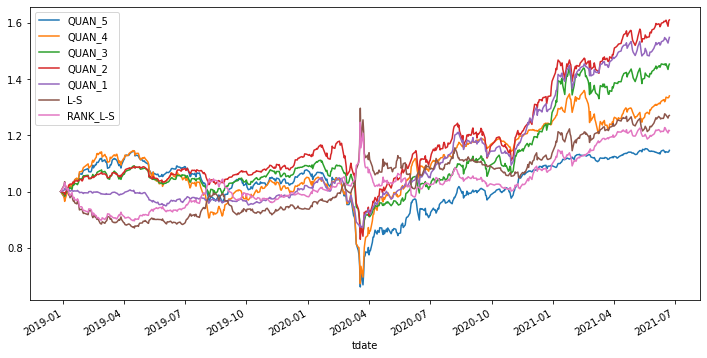

In [40]:
daily_summary, daily_ress = get_report(score)
daily_ress.plot(figsize = (12, 6))
daily_summary

,QUAN_5,QUAN_4,QUAN_3,QUAN_2,QUAN_1,L-S,RANK_L-S
RETURN,1.141451,1.416065,1.563366,1.614730,1.446597,1.192769,1.137488
MDD,-0.415326,-0.376259,-0.205302,-0.277986,-0.250961,-0.228569,-0.213065
TURNOVER,22.089123,30.894006,51.513868,51.502674,32.641872,54.730995,46.848263
CAGR,0.045087,0.122952,0.160611,0.173185,0.130965,0.060520,0.043876
SHARPE,0.083190,0.186751,0.293653,0.274753,0.282569,0.112498,0.101120


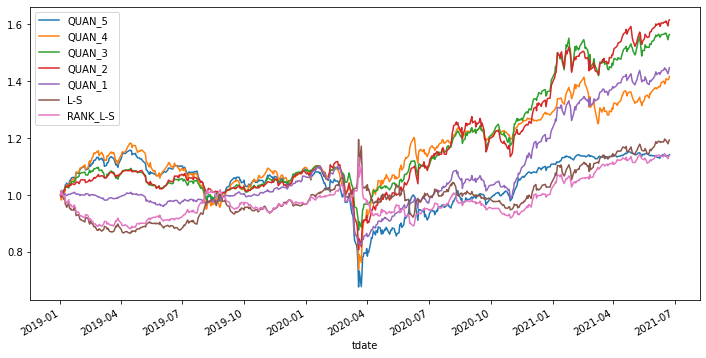

In [39]:
weekly_summary, weekly_ress = get_report(weekly_score)
weekly_ress.plot(figsize = (12, 6))
weekly_summary

,QUAN_5,QUAN_4,QUAN_3,QUAN_2,QUAN_1,L-S,RANK_L-S
RETURN,1.167233,1.286715,1.420850,1.754655,1.563619,1.276821,1.253850
MDD,-0.421968,-0.342655,-0.260765,-0.263792,-0.267574,-0.184728,-0.153214
TURNOVER,7.994709,10.956719,18.715906,17.921387,12.892292,20.887000,17.521489
CAGR,0.052897,0.087663,0.124215,0.206139,0.160674,0.084867,0.078322
SHARPE,0.095744,0.150071,0.223667,0.323711,0.323818,0.162925,0.186864


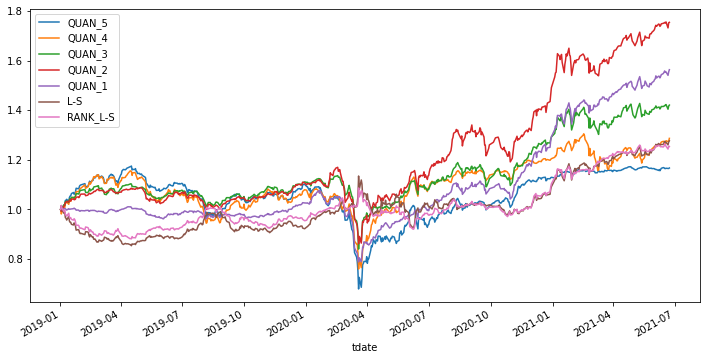

In [41]:
monthly_summary, monthly_ress = get_report(monthly_score)
monthly_ress.plot(figsize = (12, 6))
monthly_summary